In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random

In [0]:
np.random.seed(0)

(60000, 28, 28)
(10000, 28, 28)


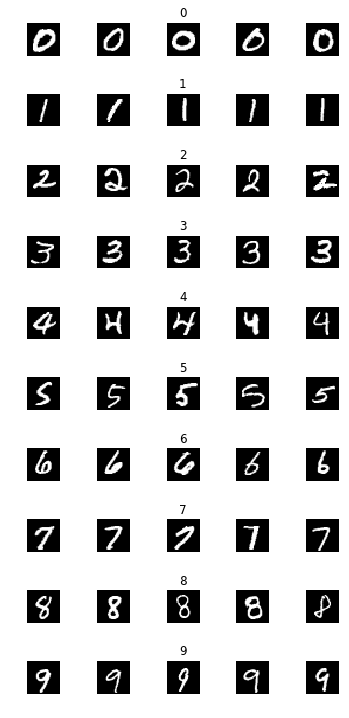

In [52]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


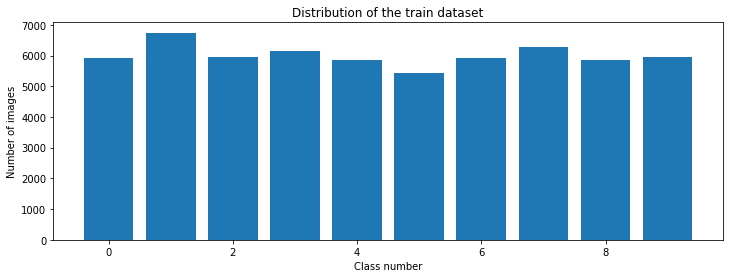

In [53]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
 X_train = X_train/255
X_test = X_test/255

In [0]:
# Define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28,28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [58]:
model = leNet_model()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.2476 - acc: 0.9199 - val_loss: 0.0495 - val_acc: 0.9853
Epoch 2/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0688 - acc: 0.9787 - val_loss: 0.0341 - val_acc: 0.9907
Epoch 3/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0564 - acc: 0.9824 - val_loss: 0.0464 - val_acc: 0.9877
Epoch 4/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0532 - acc: 0.9828 - val_loss: 0.0384 - val_acc: 0.9897
Epoch 5/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0443 - acc: 0.9870 - val_loss: 0.0296 - val_acc: 0.9907
Epoch 6/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0427 - acc: 0.9870 - val_loss: 0.0390 - val_acc: 0.9895
Epoch 7/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0356 - acc: 0.9886 - val_loss: 0.0327 - val_acc:

Text(0.5, 0, 'epoch')

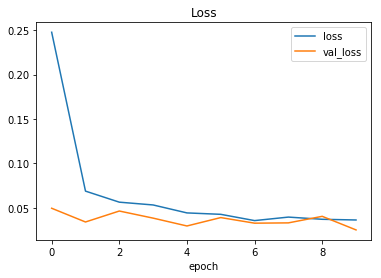

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

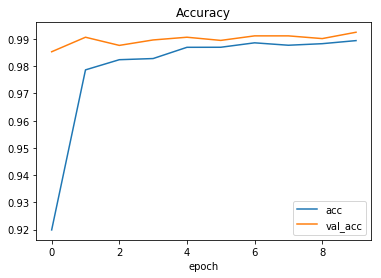

In [60]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [61]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Test Score:  0.033651084029762614
Test Accuracy:  0.9903


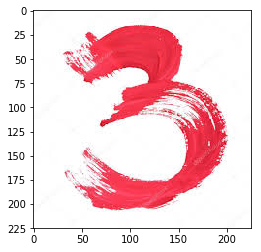

In [62]:
import requests
from PIL import Image

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
# url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'

response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

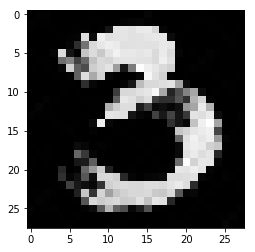

In [63]:
import cv2 

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(gray_scale.shape)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap("gray"))

In [0]:
img = img/255
img = img.reshape(1, 28, 28, 1)

In [65]:
prediction = model.predict_classes(img)
print("predicted digit: ", str(prediction))

predicted digit:  [3]


In [66]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Test Score:  0.033651084029762614
Test Accuracy:  0.9903


In [75]:
layers1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layers2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
visual_layer1, visual_layer2 = layers1.predict(img), layers2.predict(img)
print("1:" , visual_layer1.shape)
print("2:" , visual_layer2.shape)

1: (1, 24, 24, 30)
2: (1, 10, 10, 15)


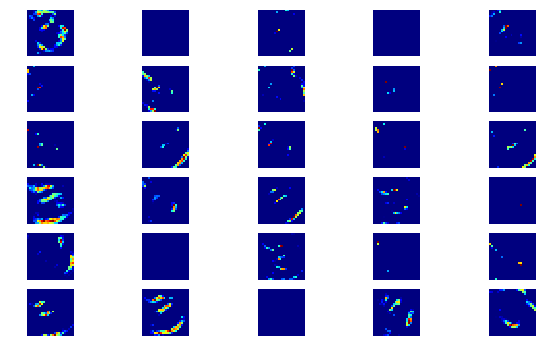

In [83]:
plt.figure(figsize=(10, 6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

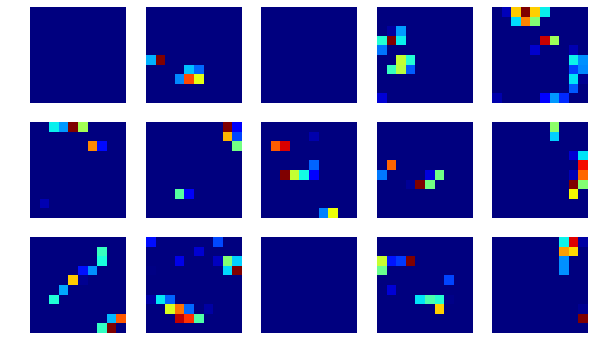

In [84]:
plt.figure(figsize=(10, 6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')